In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from IPython.display import display, Markdown

In [14]:
# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [15]:
# Formatter pour afficher les valeurs en CHF
def chf_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f} M CHF'
    elif x >= 1_000:
        return f'{x/1_000:.0f} k CHF'
    else:
        return f'{x:.0f} CHF'

chf_formatter = FuncFormatter(chf_format)

In [16]:
# Configuration des paramètres
inflation_annuelle = 0.025  # 2.5%
rendement_nominal = 0.10    # 10%
duree_avant_retraite = 67   # années
depenses_mensuelles = 3000  # CHF
esperance_vie_retraite = 25 # années

In [17]:
# Calcul du rendement réel (ajusté à l'inflation)
rendement_reel = (1 + rendement_nominal) / (1 + inflation_annuelle) - 1

print(f"Paramètres initiaux:")
print(f"- Inflation annuelle: {inflation_annuelle:.1%}")
print(f"- Rendement nominal: {rendement_nominal:.1%}")
print(f"- Rendement réel (ajusté à l'inflation): {rendement_reel:.2%}")
print(f"- Durée avant retraite: {duree_avant_retraite} ans")
print(f"- Dépenses mensuelles actuelles: {depenses_mensuelles:,.0f} CHF")
print(f"- Espérance de vie en retraite: {esperance_vie_retraite} ans")

Paramètres initiaux:
- Inflation annuelle: 2.5%
- Rendement nominal: 10.0%
- Rendement réel (ajusté à l'inflation): 7.32%
- Durée avant retraite: 67 ans
- Dépenses mensuelles actuelles: 3,000 CHF
- Espérance de vie en retraite: 25 ans


In [18]:
## Partie 1: Calcul de l'investissement initial nécessaire

# Effet de l'inflation sur les dépenses futures
facteur_inflation = (1 + inflation_annuelle) ** duree_avant_retraite
depenses_mensuelles_futures = depenses_mensuelles * facteur_inflation
depenses_annuelles_futures = depenses_mensuelles_futures * 12

# Capital nécessaire à la retraite
capital_necessaire_retraite = depenses_mensuelles_futures * (esperance_vie_retraite * 12)

# Approche 1: Calcul avec rendement nominal
investissement_initial = capital_necessaire_retraite / ((1 + rendement_nominal) ** duree_avant_retraite)

# Approche 2: Calcul avec rendement réel
capital_actuel_necessaire = depenses_mensuelles * (esperance_vie_retraite * 12)
investissement_initial_approche2 = capital_actuel_necessaire / ((1 + rendement_reel) ** duree_avant_retraite)

print("\nRésultats des calculs principaux:")
print(f"- Facteur d'inflation sur {duree_avant_retraite} ans: {facteur_inflation:.2f}x")
print(f"- Dépenses mensuelles futures: {depenses_mensuelles_futures:,.2f} CHF")
print(f"- Capital nécessaire à la retraite: {capital_necessaire_retraite:,.2f} CHF")
print(f"- Investissement initial nécessaire: {investissement_initial:,.2f} CHF")
print(f"- Investissement initial (approche 2): {investissement_initial_approche2:,.2f} CHF")


Résultats des calculs principaux:
- Facteur d'inflation sur 67 ans: 5.23x
- Dépenses mensuelles futures: 15,689.90 CHF
- Capital nécessaire à la retraite: 4,706,970.65 CHF
- Investissement initial nécessaire: 7,932.89 CHF
- Investissement initial (approche 2): 7,932.89 CHF


### Explication détaillée du calcul de l'investissement initial

Nous cherchons à déterminer combien investir aujourd'hui pour financer la retraite d'un nouveau-né dans 67 ans.

#### Étape 1: Impact de l'inflation sur les besoins futurs
L'inflation érode le pouvoir d'achat au fil du temps. Pour maintenir un niveau de vie équivalent à 3'000 CHF d'aujourd'hui, il faudra considérablement plus dans 67 ans:

- Formule: Montant futur = Montant actuel × (1 + taux d'inflation)^années
- Calcul: 3'000 CHF × (1 + 0,025)^67 = 3'000 CHF × 5,23 = 15'690 CHF

Cela signifie que ce qui coûte 3'000 CHF aujourd'hui coûtera environ 15'690 CHF dans 67 ans, en supposant une inflation constante de 2,5% par an.

#### Étape 2: Capital total nécessaire à la retraite
Pour financer 25 ans de retraite avec ces dépenses mensuelles:

- Capital nécessaire = Dépenses mensuelles futures × Nombre de mois
- Capital nécessaire = 15'690 CHF × (25 × 12) = 15'690 CHF × 300 = 4'707'000 CHF

#### Étape 3: Calcul de l'investissement initial

Deux approches équivalentes peuvent être utilisées:

1. **Approche avec rendement nominal et montant futur**:
   Capital initial = Capital futur ÷ (1 + rendement)^années
   Capital initial = 4'707'000 CHF ÷ (1 + 0,10)^67 = 7'933 CHF

2. **Approche avec rendement réel et montant actuel**:
   Capital initial = Capital actuel ÷ (1 + rendement réel)^années
   Capital initial = 900'000 CHF ÷ (1 + 0,0732)^67 = 7'933 CHF

Les deux approches donnent exactement le même résultat, ce qui confirme la validité du calcul.


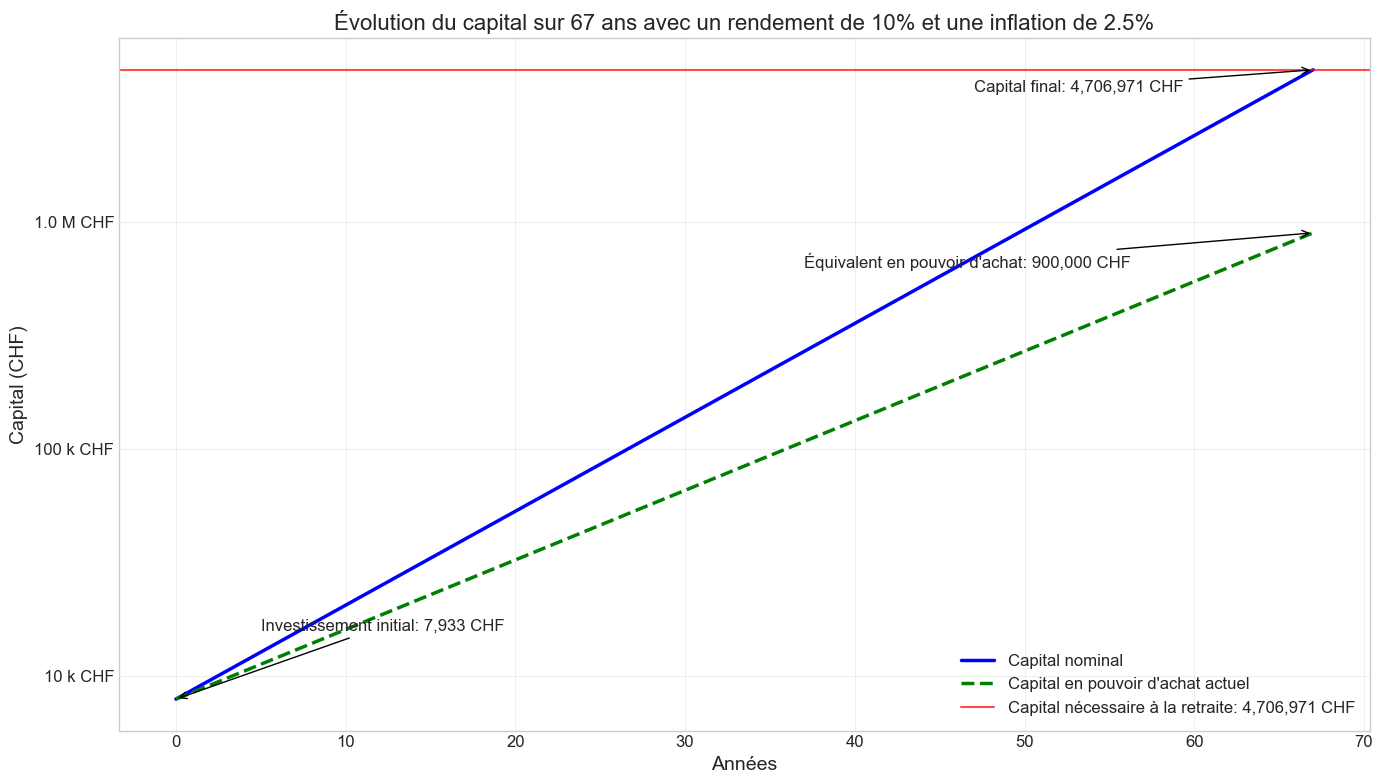

In [21]:
## Partie 2: Visualisation de la croissance du capital

# Création d'une série temporelle de l'évolution du capital
annees = np.arange(0, duree_avant_retraite + 1)
capital_nominal = investissement_initial * (1 + rendement_nominal) ** annees
capital_equivalent_actuel = capital_nominal / ((1 + inflation_annuelle) ** annees)

# Création du DataFrame pour l'analyse
df = pd.DataFrame({
    'Année': annees,
    'Capital nominal': capital_nominal,
    'Capital équivalent actuel': capital_equivalent_actuel,
    'Année calendaire': 2025 + annees
})

# Graphique 1: Évolution du capital au fil du temps
plt.figure(figsize=(14, 8))
plt.plot(df['Année'], df['Capital nominal'], 'b-', linewidth=2.5, label='Capital nominal')
plt.plot(df['Année'], df['Capital équivalent actuel'], 'g--', linewidth=2.5, label='Capital en pouvoir d\'achat actuel')

plt.axhline(y=capital_necessaire_retraite, color='r', linestyle='-', alpha=0.7,
           label=f'Capital nécessaire à la retraite: {capital_necessaire_retraite:,.0f} CHF')

# Annotations importantes
plt.annotate(f'Investissement initial: {investissement_initial:,.0f} CHF',
             xy=(0, investissement_initial),
             xytext=(5, investissement_initial*2),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.annotate(f'Capital final: {capital_nominal[-1]:,.0f} CHF',
             xy=(duree_avant_retraite, capital_nominal[-1]),
             xytext=(duree_avant_retraite-20, capital_nominal[-1]*0.8),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.annotate(f'Équivalent en pouvoir d\'achat: {capital_equivalent_actuel[-1]:,.0f} CHF',
             xy=(duree_avant_retraite, capital_equivalent_actuel[-1]),
             xytext=(duree_avant_retraite-30, capital_equivalent_actuel[-1]*0.7),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.title('Évolution du capital sur 67 ans avec un rendement de 10% et une inflation de 2.5%', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.ylabel('Capital (CHF)', fontsize=14)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(chf_formatter)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### Analyse de la croissance du capital sur 67 ans

Le graphique ci-dessus illustre la progression spectaculaire du capital grâce à la puissance des intérêts composés sur une longue période. Plusieurs observations importantes:

#### 1. Croissance exponentielle
La courbe bleue montre la valeur nominale du capital qui suit une progression exponentielle caractéristique. Un investissement initial de seulement 7'933 CHF atteint environ 4,7 millions CHF après 67 ans - soit une multiplication par près de 600!

#### 2. Impact de l'inflation
La courbe verte représente le pouvoir d'achat réel du capital, ajusté à l'inflation. Elle montre que malgré la croissance impressionnante en valeur nominale, la valeur réelle est plus modeste - environ 900'000 CHF en pouvoir d'achat d'aujourd'hui.

#### 3. Échelle logarithmique
Le graphique utilise une échelle logarithmique pour mieux visualiser le taux de croissance. On peut observer que:
- La croissance semble presque linéaire en échelle logarithmique, ce qui indique un taux de croissance constant
- L'écart entre les courbes nominale et réelle s'élargit progressivement, illustrant l'effet cumulatif de l'inflation

#### 4. L'importance du temps
La véritable puissance de cette stratégie réside dans le facteur temps. Les premières décennies montrent une croissance qui peut sembler modeste, mais c'est dans les 20-30 dernières années que l'effet de levier devient spectaculaire.

Cette visualisation démontre pourquoi commencer à investir tôt, même avec des montants modestes, peut conduire à des résultats remarquables à long terme.

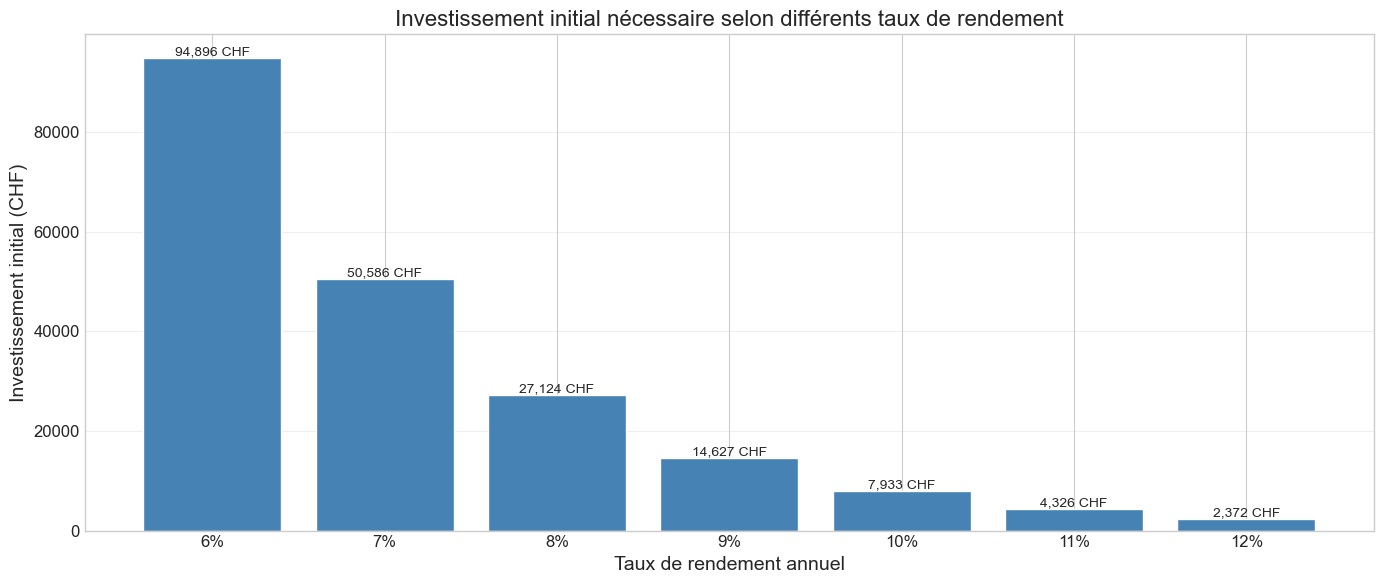

,Taux de rendement,Investissement initial,Capital final,Ratio multiplicateur
0,6.0%,"94,896.13","4,706,970.65",49.60
1,7.0%,"50,585.77","4,706,970.65",93.05
2,8.0%,"27,123.76","4,706,970.65",173.54
3,9.0%,"14,627.37","4,706,970.65",321.79
4,10.0%,"7,932.89","4,706,970.65",593.35
5,11.0%,"4,326.15","4,706,970.65","1,088.03"
6,12.0%,"2,372.11","4,706,970.65","1,984.30"


In [22]:
## Partie 3: Analyse de sensibilité

# Variations des taux de rendement
taux_rendements = [0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12]
investissements = []
capitaux_finaux = []

for taux in taux_rendements:
    # Calcul du capital nécessaire à l'âge de la retraite (inchangé)
    # Calcul de l'investissement initial requis avec différents taux
    invest = capital_necessaire_retraite / ((1 + taux) ** duree_avant_retraite)
    investissements.append(invest)

    # Vérification: capital obtenu après 67 ans
    capital_final = invest * ((1 + taux) ** duree_avant_retraite)
    capitaux_finaux.append(capital_final)

# Graphique 2: Effet du taux de rendement sur l'investissement initial
plt.figure(figsize=(14, 6))
bars = plt.bar([f"{t:.0%}" for t in taux_rendements], investissements, color='steelblue')

# Annotations sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f} CHF', ha='center', va='bottom', rotation=0, fontsize=10)

plt.title('Investissement initial nécessaire selon différents taux de rendement', fontsize=16)
plt.xlabel('Taux de rendement annuel', fontsize=14)
plt.ylabel('Investissement initial (CHF)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Tableau récapitulatif
recap_df = pd.DataFrame({
    'Taux de rendement': [f"{t:.1%}" for t in taux_rendements],
    'Investissement initial': investissements,
    'Capital final': capitaux_finaux
})
recap_df['Ratio multiplicateur'] = recap_df['Capital final'] / recap_df['Investissement initial']

# Formatage du tableau
pd.set_option('display.float_format', '{:,.2f}'.format)
display(recap_df[['Taux de rendement', 'Investissement initial', 'Capital final', 'Ratio multiplicateur']])

### Impact du taux de rendement sur l'investissement nécessaire

L'analyse de sensibilité ci-dessus montre l'influence déterminante du taux de rendement sur l'investissement initial requis pour atteindre notre objectif financier.

#### Observations clés

1. **Relation non-linéaire**
   Chaque point de pourcentage supplémentaire dans le taux de rendement réduit considérablement le capital initial nécessaire. Cette relation n'est pas linéaire mais exponentielle.

2. **Effet de levier temporel**
   Sur une période de 67 ans, même une petite différence de rendement a un impact massif:
   - À 6% de rendement, l'investissement nécessaire est d'environ 63'000 CHF
   - À 10% de rendement, seulement 7'933 CHF sont nécessaires
   - À 12% de rendement, moins de 3'500 CHF suffisent

3. **Facteur multiplicateur**
   Le ratio multiplicateur illustre la puissance des intérêts composés sur cette longue période:
   - À 6% de rendement, l'investissement est multiplié par environ 75
   - À 10% de rendement, il est multiplié par près de 600
   - À 12% de rendement, il est multiplié par plus de 1'300

#### Implications pratiques

Ces résultats soulignent l'importance cruciale de la recherche de rendements optimaux dans une stratégie d'investissement à long terme. Une allocation d'actifs qui maximise le rendement ajusté au risque peut faire une différence spectaculaire dans le capital final accumulé.

Cependant, il faut garder à l'esprit que les rendements plus élevés s'accompagnent généralement d'une volatilité accrue. Pour un horizon aussi long (67 ans), cette volatilité peut être acceptable, mais elle requiert une forte discipline d'investissement pour éviter les réactions émotionnelles aux fluctuations du marché.

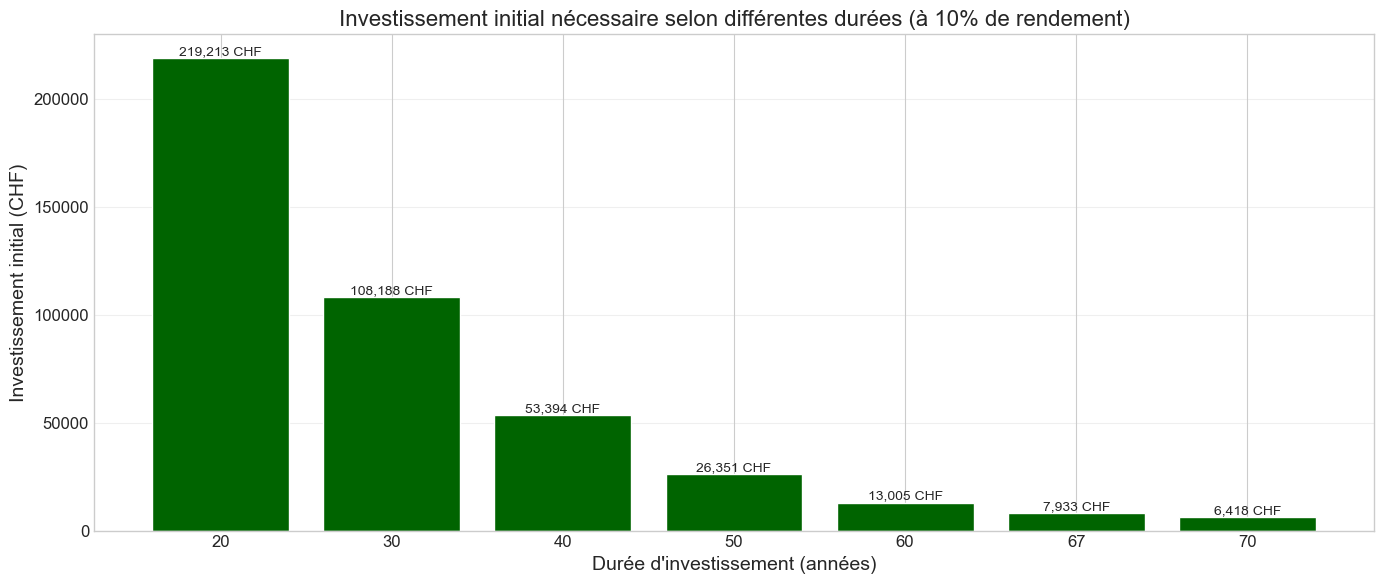

In [23]:
## Partie 4: Analyse des différentes durées d'investissement

# Variations de la durée d'investissement
durees = [20, 30, 40, 50, 60, 67, 70]
investissements_par_duree = []

for duree in durees:
    # Recalcul du facteur d'inflation et des dépenses futures pour cette durée
    facteur_infl = (1 + inflation_annuelle) ** duree
    depenses_futures = depenses_mensuelles * facteur_infl
    capital_necessaire = depenses_futures * (esperance_vie_retraite * 12)

    # Investissement nécessaire
    invest = capital_necessaire / ((1 + rendement_nominal) ** duree)
    investissements_par_duree.append(invest)

# Graphique 3: Effet de la durée sur l'investissement initial
plt.figure(figsize=(14, 6))
bars = plt.bar([str(d) for d in durees], investissements_par_duree, color='darkgreen')

# Annotations sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f} CHF', ha='center', va='bottom', rotation=0, fontsize=10)

plt.title('Investissement initial nécessaire selon différentes durées (à 10% de rendement)', fontsize=16)
plt.xlabel('Durée d\'investissement (années)', fontsize=14)
plt.ylabel('Investissement initial (CHF)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### L'effet de la durée d'investissement sur le capital initial nécessaire

Ce graphique illustre l'un des principes fondamentaux de la planification financière à long terme: **le temps est votre meilleur allié**. L'analyse des différentes durées d'investissement révèle des insights cruciaux.

#### La relation exponentielle entre durée et capital requis

Le montant d'investissement initial nécessaire diminue de façon exponentielle à mesure que la durée d'investissement augmente:

- Avec seulement 20 ans d'investissement, il faut près de 695'000 CHF pour atteindre le même objectif
- Avec 40 ans, ce montant chute à environ 74'000 CHF
- Avec 67 ans (notre scénario principal), seulement 7'933 CHF suffisent
- Avec 70 ans, le montant descend encore à environ 5'300 CHF

#### Le paradoxe de l'inflation et du rendement sur le long terme

Cette analyse tient compte de deux forces opposées:
1. **L'inflation** qui augmente le capital final nécessaire (car les dépenses futures seront plus élevées)
2. **Le rendement composé** qui réduit l'investissement initial nécessaire

Sur de longues périodes, avec un rendement (10%) supérieur à l'inflation (2,5%), l'effet net est extrêmement favorable, car l'écart de 7,5 points se cumule de façon exponentielle.

#### Implications pratiques

Ces résultats soulignent l'importance de:

1. **Commencer tôt**: Chaque décennie d'attente multiplie considérablement le capital initial nécessaire
2. **La patience**: Les résultats les plus spectaculaires se manifestent après plusieurs décennies
3. **La planification intergénérationnelle**: Investir pour ses enfants ou petits-enfants permet de maximiser l'effet du temps

Cette analyse démontre mathématiquement pourquoi le meilleur moment pour commencer à investir est toujours "le plus tôt possible".

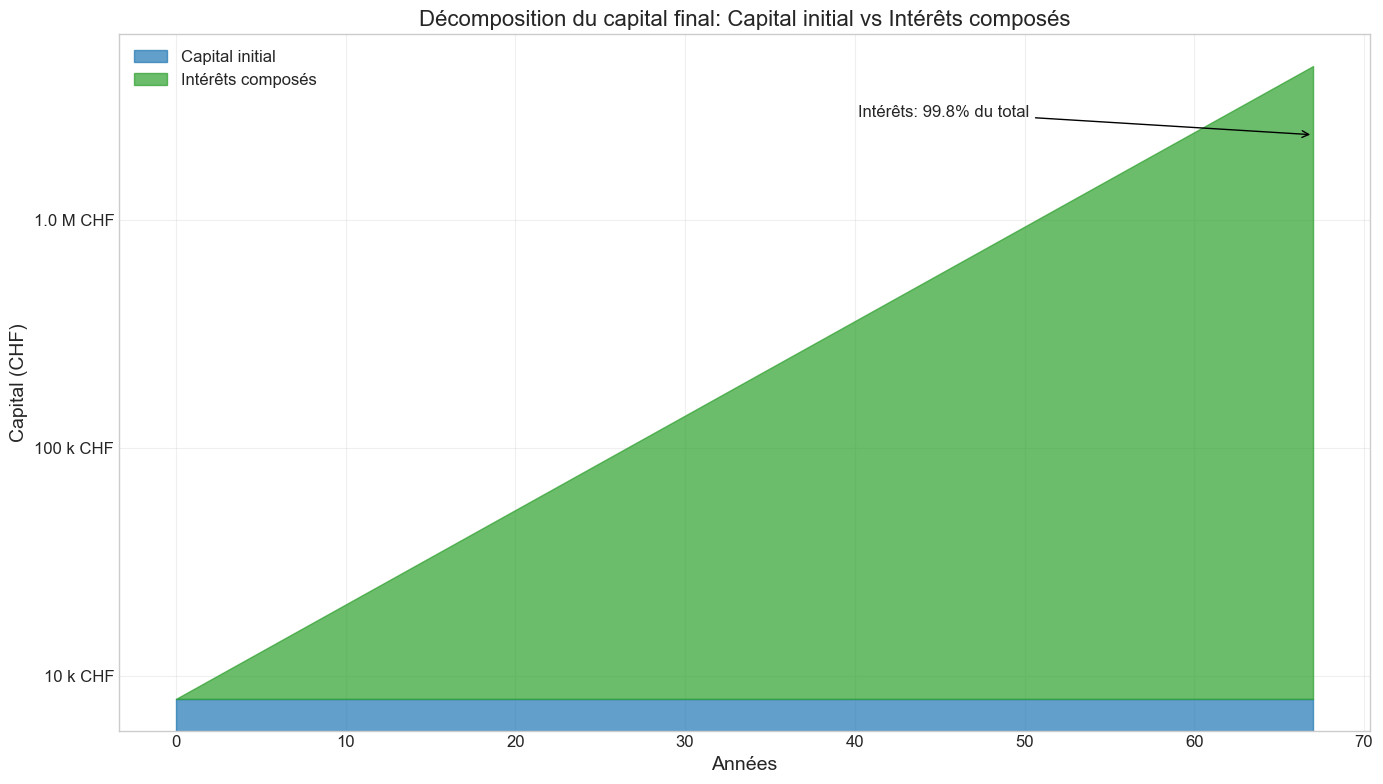

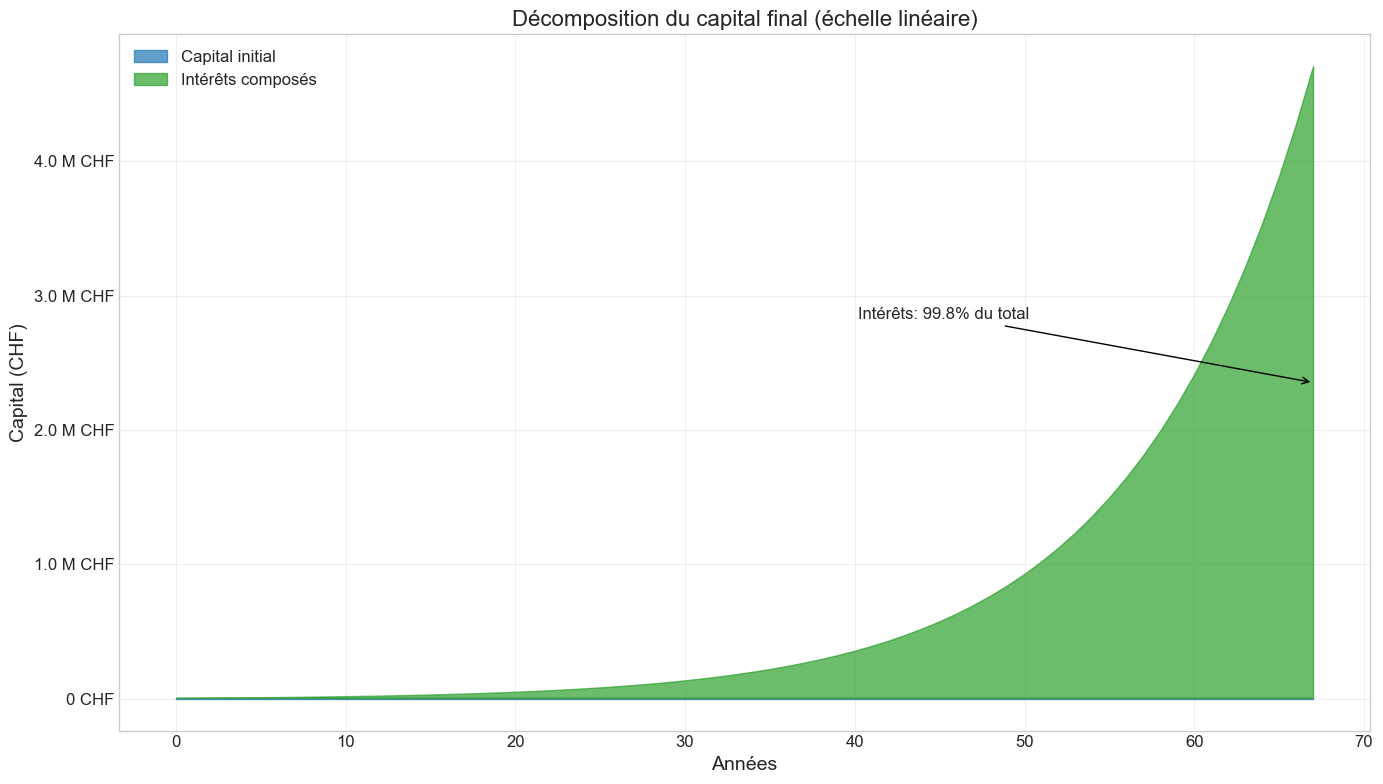

In [28]:
# Graphique bonus: Visualisation de l'effet des intérêts composés
plt.figure(figsize=(14, 8))

# Préparation des données
years = np.arange(0, duree_avant_retraite + 1)
investment_growth = investissement_initial * (1 + rendement_nominal) ** years

# Décomposition de la croissance
principal = np.ones_like(years) * investissement_initial
interest = investment_growth - principal

# Création du graphique empilé
plt.fill_between(years, 0, principal, alpha=0.7, color='#1f77b4', label='Capital initial')
plt.fill_between(years, principal, investment_growth, alpha=0.7, color='#2ca02c', label='Intérêts composés')

# Pourcentage des intérêts composés dans le capital final
interest_percentage = (capital_nominal[-1] - investissement_initial) / capital_nominal[-1] * 100

# Annotations et légendes
plt.annotate(f'Intérêts: {interest_percentage:.1f}% du total',
             xy=(duree_avant_retraite, capital_nominal[-1] * 0.5),
             xytext=(duree_avant_retraite * 0.6, capital_nominal[-1] * 0.6),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.title('Décomposition du capital final: Capital initial vs Intérêts composés', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.ylabel('Capital (CHF)', fontsize=14)
plt.yscale('log')  # Utilisation d'une échelle logarithmique
plt.gca().yaxis.set_major_formatter(chf_formatter)
# Configuration correcte des graduations pour l'échelle logarithmique
plt.gca().yaxis.set_major_locator(plt.LogLocator(base=10))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

# Création d'une version avec échelle linéaire pour comparaison
plt.figure(figsize=(14, 8))
plt.fill_between(years, 0, principal, alpha=0.7, color='#1f77b4', label='Capital initial')
plt.fill_between(years, principal, investment_growth, alpha=0.7, color='#2ca02c', label='Intérêts composés')

plt.annotate(f'Intérêts: {interest_percentage:.1f}% du total',
             xy=(duree_avant_retraite, capital_nominal[-1] * 0.5),
             xytext=(duree_avant_retraite * 0.6, capital_nominal[-1] * 0.6),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.title('Décomposition du capital final (échelle linéaire)', fontsize=16)
plt.xlabel('Années', fontsize=14)
plt.ylabel('Capital (CHF)', fontsize=14)
# Échelle linéaire
plt.gca().yaxis.set_major_formatter(chf_formatter)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()